# Estrategias para Manejar la Falta de Datos en Series de Tiempo

Ejemplo de Interpolación y Uso de Ventanas Deslizantes

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Generar datos de ejemplo con valores faltantes
np.random.seed(42)
dates = pd.date_range('20230101', periods=10)
data = np.random.randn(10)
data[2:5] = np.nan  # Introducir valores faltantes
df = pd.DataFrame(data, index=dates, columns=['value'])

In [2]:
df

,value
2023-01-01,0.496714
2023-01-02,-0.138264
2023-01-03,NaN
2023-01-04,NaN
2023-01-05,NaN
2023-01-06,-0.234137
2023-01-07,1.579213
2023-01-08,0.767435
2023-01-09,-0.469474
2023-01-10,0.542560


In [4]:
# Interpolación para llenar valores faltantes
df['value'] = df['value'].interpolate()
df

,value
2023-01-01,0.496714
2023-01-02,-0.138264
2023-01-03,-0.162232
2023-01-04,-0.186201
2023-01-05,-0.210169
2023-01-06,-0.234137
2023-01-07,1.579213
2023-01-08,0.767435
2023-01-09,-0.469474
2023-01-10,0.542560


Ventanas Deslizantes

La técnica de ventanas deslizantes no genera datos nuevos adicionales, sino que reorganiza los datos existentes para crear múltiples instancias de entrenamiento a partir de la misma secuencia original. 
Por ejemplo, si la serie es [a, b, c, d, e, f] y window_size = 3, se generan las siguientes ventanas:
([a, b, c], d)
([b, c, d], e)
([c, d, e], f)

In [10]:
# Crear ventanas deslizantes
def create_sliding_windows(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

window_size = 3
X, y = create_sliding_windows(df['value'].values, window_size)
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train:", X_train)
print("y_train:", y_train)

X_train: [[-0.23413696  1.57921282  0.76743473]
 [-0.16223247 -0.18620063 -0.21016879]
 [-0.21016879 -0.23413696  1.57921282]
 [-0.18620063 -0.21016879 -0.23413696]
 [ 1.57921282  0.76743473 -0.46947439]]
y_train: [-0.46947439 -0.23413696  0.76743473  1.57921282  0.54256004]


Técnicas para Ampliar Datos en Series de Tiempo

Bootstrapping:

Se pueden crear nuevas series temporales resampleando con reemplazo los datos originales. Esto genera múltiples versiones de la serie temporal que mantienen las propiedades estadísticas de los datos originales.
Data Augmentation:
    

Jittering: Añadir ruido aleatorio a los datos originales para crear variaciones.
Time Warping: Modificar la escala de tiempo, aunque esto debe hacerse con cuidado.
Window Slicing: Extraer segmentos aleatorios de la serie temporal.
Window Wrapping: Combinar varios segmentos para crear nuevas instancias.
    
Modelos Generativos:

Generative Adversarial Networks (GANs): Aplicar GANs específicamente diseñadas para series temporales para generar nuevas secuencias.
Variational Autoencoders (VAEs): Usar VAEs para generar nuevas instancias de datos que respeten las propiedades estadísticas de los datos originales.
Simulación de Datos:

Si se tiene un buen entendimiento del proceso que genera los datos, se puede simular nuevas series temporales utilizando modelos estadísticos como ARIMA o procesos de Monte Carlo.

In [15]:
#Ejemplo de Bootstrapping en Series Temporales
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generar datos de ejemplo
np.random.seed(42)
dates = pd.date_range('20230101', periods=10)
data = np.random.randn(10)
df = pd.DataFrame(data, index=dates, columns=['value'])




In [16]:
df

,value
2023-01-01,0.496714
2023-01-02,-0.138264
2023-01-03,0.647689
2023-01-04,1.523030
2023-01-05,-0.234153
2023-01-06,-0.234137
2023-01-07,1.579213
2023-01-08,0.767435
2023-01-09,-0.469474
2023-01-10,0.542560


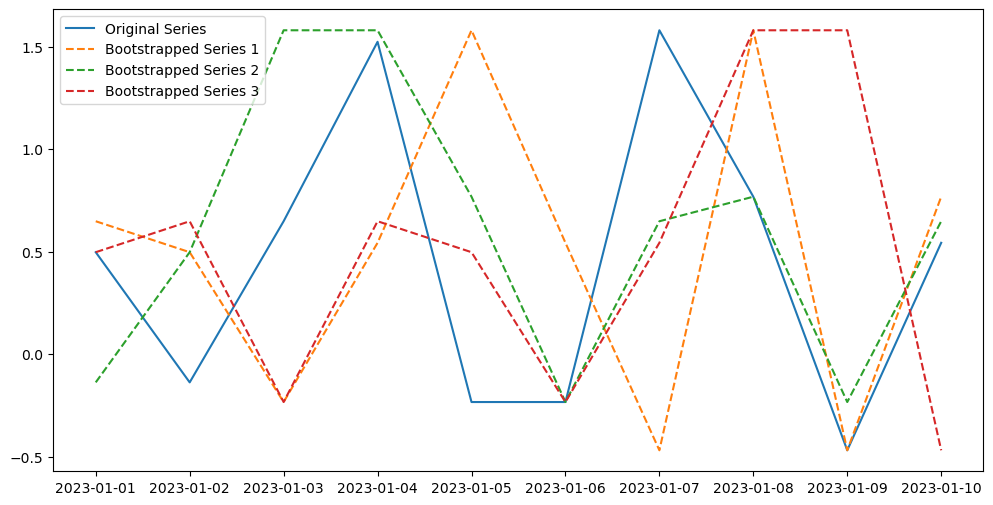

In [20]:
# Función de bootstrapping
def bootstrap_series(data, n_samples):
    bootstrapped_data = []
    for _ in range(n_samples):
        sample = np.random.choice(data, size=len(data), replace=True)
        bootstrapped_data.append(sample)
    return np.array(bootstrapped_data)

# Generar series bootstrapped
n_samples = 3
bootstrapped_data = bootstrap_series(df['value'].values, n_samples)

# Mostrar las series originales y las bootstrapped
plt.figure(figsize=(12, 6))
plt.plot(df['value'], label='Original Series')
for i, sample in enumerate(bootstrapped_data):
    plt.plot(df.index, sample, label=f'Bootstrapped Series {i+1}', linestyle='--')
plt.legend()
plt.show()

In [35]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Generar datos de ejemplo
np.random.seed(42)
dates = pd.date_range('20230101', periods=10)
data = np.sin(np.linspace(0, 10, 10)) + np.random.normal(scale=0.5, size=10)
df = pd.DataFrame(data, index=dates, columns=['value'])

# Función de bootstrapping
def bootstrap_series(data, n_samples):
    bootstrapped_data = []
    for _ in range(n_samples):
        sample = np.random.choice(data, size=len(data), replace=True)
        bootstrapped_data.append(sample)
    return np.array(bootstrapped_data)

# Generar series bootstrapped
n_samples = 10
bootstrapped_data = bootstrap_series(df['value'].values, n_samples)

# Función para crear ventanas deslizantes
def create_sliding_windows(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

# Entrenar y evaluar el modelo en cada muestra bootstrapped
window_size = 5
all_predictions = []
all_true_values = []

for sample in bootstrapped_data:
    X, y = create_sliding_windows(sample, window_size)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Entrenar el modelo
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Realizar predicciones
    y_pred = model.predict(X_test)
    all_predictions.append(y_pred)
    all_true_values.append(y_test)

# Convertir listas a arrays y asegurarse de que las dimensiones sean correctas
all_predictions = np.concatenate(all_predictions)
all_true_values = np.concatenate(all_true_values)



In [36]:
all_predictions

array([-0.13215369,  1.02348889, -1.21602327, -0.47803365,  2.4870331 ,
        0.57618998,  0.78293774,  1.42454007,  0.87826526,  0.97219635])

In [37]:
all_true_values

array([-0.27274109,  0.27586849,  0.82706005,  0.82706005,  0.57094697,
        0.27586849,  1.11906433,  0.27586849,  1.11906433, -0.27274109])

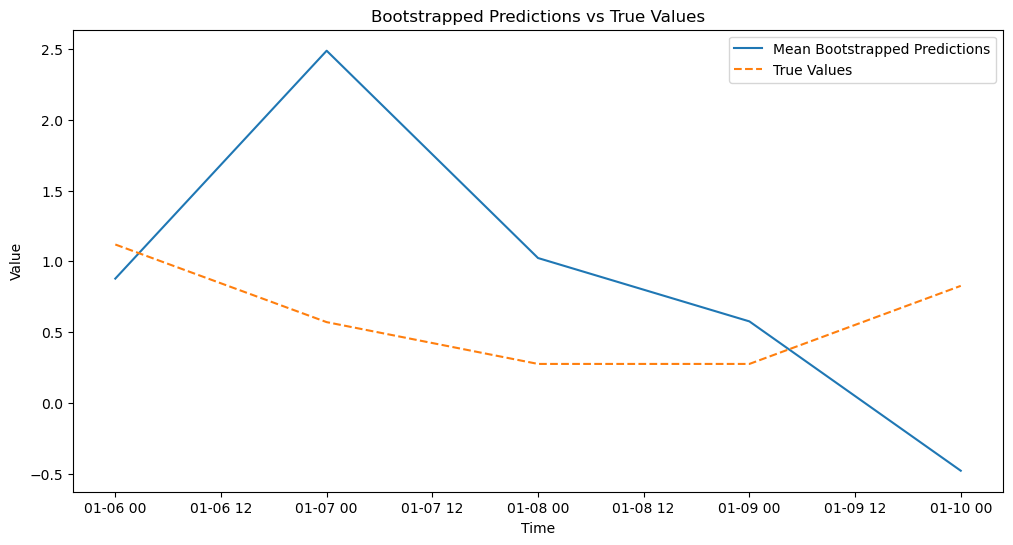

In [38]:
# Tomar un subconjunto para la visualización (solo para una parte de los datos de prueba)
subset_size = 5  # Tamaño del subconjunto para la visualización
indices = np.random.choice(len(all_true_values), subset_size, replace=False)

# Visualización de los resultados
plt.figure(figsize=(12, 6))
plt.plot(df.index[window_size:window_size + subset_size], all_predictions[indices], label='Mean Bootstrapped Predictions', linestyle='-')
plt.plot(df.index[window_size:window_size + subset_size], all_true_values[indices], label='True Values', linestyle='--')
plt.title('Bootstrapped Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()